# Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

## Instructions
    Load the dataset and explore the variables.
    We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
    Extract the target variable.
    Extract the independent variables and scale them.
    Build the logistic regression model.
    Evaluate the model.
    Even a simple model will give us more than 70% accuracy. Why?
    Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
    Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [48]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks

### Getting the data from csv file.

In [2]:
churnData = pd.read_csv('customer_churn.csv')
churnData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Getting the needed variables for the model

In [3]:
churnData_independent = churnData[['tenure','SeniorCitizen','MonthlyCharges']]

In [4]:
churnData_dependent = churnData['Churn']

### Exploring the data

In [5]:
churnData_independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


All selected independent variables are numerical.

In [6]:
# daemonstration of the data imbalance
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
transformer = StandardScaler().fit(churnData_independent)
X = transformer.transform(churnData_independent)

### Train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, churnData_dependent, test_size=0.3, random_state = 100)

### Modeling and Model Validation

In [9]:
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.78 


In [10]:
print("The accuracy of a blind guess (when we blindly say that each predicition is 'No') is: %4.2f " % (5163/(5163+1869)))

The accuracy of a blind guess (when we blindly say that each predicition is 'No') is: 0.73 


[[1392  155]
 [ 308  258]]


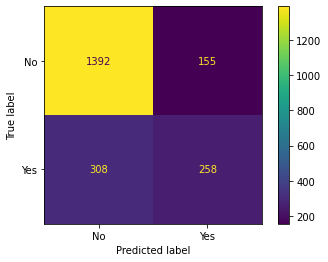

The Kappa of your model is: 0.39


In [11]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))

In [12]:
print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.62      0.46      0.53       566
          No       0.82      0.90      0.86      1547

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



#### The performance of this model is suprisingly not bad, it manages to predict some 'Yes'-s. But we can try to improve it.

## SMOTE oversampling

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

### Actual oversampling

In [76]:
oversample = SMOTE()
transformer = StandardScaler().fit(churnData_independent)
Scaled_X = transformer.transform(churnData_independent)
X, y = oversample.fit_resample(Scaled_X, churnData_dependent)
counter = Counter(y)
print(counter)

Counter({'No': 5174, 'Yes': 5174})


### Training a model

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

In [78]:
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.74 


[[1167  390]
 [ 413 1135]]


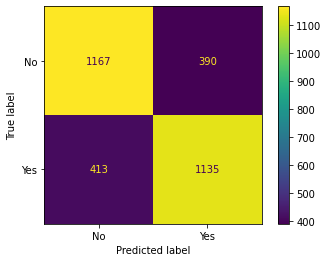

The Kappa of your model is: 0.48


In [79]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))

In [80]:
print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.74      0.73      0.74      1548
          No       0.74      0.75      0.74      1557

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



#### The results are slightly better with SMOTE oversampling.
#### But the authors of the original method suggested useing random undersampling the majority class together with SMOTE oversampling in order to get better model performance. Let's try doing this.
(https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [20]:
# summarize class distribution
counter = Counter(churnData_dependent)
print(counter)

Counter({'No': 5174, 'Yes': 1869})


In [43]:
# define pipeline
transformer = StandardScaler().fit(churnData_independent)
Scaled_X = transformer.transform(churnData_independent)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(Scaled_X, churnData_dependent)

In [44]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({'No': 5174, 'Yes': 2587})


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.75 


[[1310  228]
 [ 346  445]]


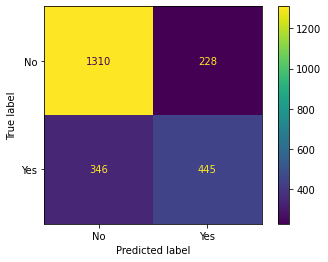

The Kappa of your model is: 0.43


In [46]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))

In [47]:
print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.66      0.56      0.61       791
          No       0.79      0.85      0.82      1538

    accuracy                           0.75      2329
   macro avg       0.73      0.71      0.71      2329
weighted avg       0.75      0.75      0.75      2329



#### As we see, random undersampling does a bad favour to out model performance. 

## UnderSampling using TomekLinks

In [67]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(Scaled_X, churnData_dependent)
y_tl.value_counts()

No     4694
Yes    1869
Name: Churn, dtype: int64

The accuracy of the logistic_regression model is: 0.79 
[[1256  138]
 [ 278  297]]


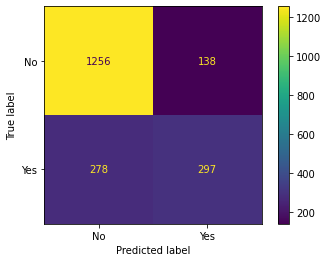

The Kappa of your model is: 0.45
              precision    recall  f1-score   support

         Yes       0.68      0.52      0.59       575
          No       0.82      0.90      0.86      1394

    accuracy                           0.79      1969
   macro avg       0.75      0.71      0.72      1969
weighted avg       0.78      0.79      0.78      1969



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state = 100)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

In [69]:
X_tl2, y_tl2 = tl.fit_sample(X_tl, y_tl)
y_tl2.value_counts()

No     4537
Yes    1869
Name: Churn, dtype: int64

The accuracy of the logistic_regression model is: 0.79 
[[1226  136]
 [ 261  299]]


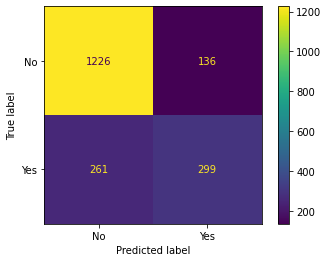

The Kappa of your model is: 0.46
              precision    recall  f1-score   support

         Yes       0.69      0.53      0.60       560
          No       0.82      0.90      0.86      1362

    accuracy                           0.79      1922
   macro avg       0.76      0.72      0.73      1922
weighted avg       0.78      0.79      0.79      1922



In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_tl2, y_tl2, test_size=0.3, random_state = 100)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### And still the performance of the model with Tomek links undersamling is not super impressive. Let's try to combine the two methods together.

## SMOTE with Tomek links

In [71]:
over = SMOTE()
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(Scaled_X, churnData_dependent)

The accuracy of the logistic_regression model is: 0.74 
[[1164  377]
 [ 404 1013]]


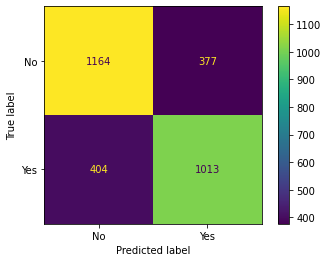

The Kappa of your model is: 0.47
              precision    recall  f1-score   support

         Yes       0.73      0.71      0.72      1417
          No       0.74      0.76      0.75      1541

    accuracy                           0.74      2958
   macro avg       0.74      0.74      0.74      2958
weighted avg       0.74      0.74      0.74      2958



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### SMOTE + Tomek links works better than SMOTE + Random Undersampling, but it seems that SMOTE oversampling alone can give better model performance in this particular situation.

# Conclusion
### The model was built with different approaches to deal with data imbalance, and we can see that in our case the method SMOTE oversampling gives relatively better model performance, judging on recall and kappa-score of the model.